# Team Benchmark

**Authors:** Marissa Nicole Esteban, Gabe Krishnadasan, Diana Montoya-Herrera, Gabe Seidl, Madeleine Woo

**Date:** 10/5/2023

### Wave Height

#### Dataset: https://www.kaggle.com/code/shaltaf/the-prediction-of-significant-wave-height-hs/notebook 

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

In [32]:
# import libraries needed
from seebuoy import NDBC
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [33]:
import pandas as pd
from seebuoy import NDBC

In [34]:
ndbc = NDBC(timeframe="historical")

In [35]:
df_avail = ndbc.available_data(station_id="44065")

In [36]:
df_data = ndbc.get_data("44065")

df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,air_temp,water_temp,dewpoint,visibility,pressure_tendency,tide
date,,,,,,,,,,,,,,
2008-10-30 17:50:00,308.0,8.2,11.0,0.67,3.70,3.36,303.0,1027.4,7.4,14.6,-1.6,NaN,NaN,NaN
2008-10-30 18:50:00,314.0,8.3,11.1,0.54,3.23,3.16,312.0,1027.5,8.2,14.7,-1.5,NaN,NaN,NaN
2008-10-30 19:50:00,303.0,7.1,9.8,0.56,3.33,3.25,312.0,1027.9,8.8,14.7,-1.9,NaN,NaN,NaN
2008-10-30 20:50:00,324.0,8.1,10.2,0.61,3.45,3.37,316.0,1028.1,9.6,14.7,-2.0,NaN,NaN,NaN
2008-10-30 21:50:00,314.0,7.9,10.3,NaN,NaN,NaN,NaN,1028.8,9.7,14.7,-2.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12 22:00:00,NaN,5.0,5.0,NaN,NaN,NaN,NaN,1007.3,NaN,6.9,NaN,NaN,-0.6,NaN
2024-03-12 22:10:00,NaN,4.0,5.0,NaN,NaN,NaN,NaN,1007.3,NaN,6.9,NaN,NaN,NaN,NaN
2024-03-12 22:20:00,NaN,4.0,4.0,NaN,NaN,NaN,NaN,1007.4,NaN,6.9,NaN,NaN,NaN,NaN


In [37]:
# dropping cols where there is 100% NA
df_data.dropna(axis=1, how='all', inplace=True)

# dropping rows where average_period is null
df_data.dropna(subset=['average_period'], inplace=True)

# dropping rows wehre wave_height is null
df_data.dropna(subset=['wave_height'], inplace=True)

In [38]:
del df_data['pressure_tendency']
del df_data['dewpoint']
del df_data['air_temp']

In [39]:
# missing data
total_na = df_data.isnull().sum().sort_values(ascending=False)

total_rows = df_data.isnull().count()
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total_na, total_rows, percent], axis=1, keys=['Total NA', 'Total Rows', 'Percent'])
missing_data

,Total NA,Total Rows,Percent
wind_direction,17953,135340,13.265110
water_temp,3892,135340,2.875720
dominant_period,1550,135340,1.145264
mean_wave_direction,1268,135340,0.936900
pressure,520,135340,0.384218
wind_gust,223,135340,0.164770
wind_speed,222,135340,0.164031
wave_height,0,135340,0.000000
average_period,0,135340,0.000000


In [44]:
df_data

,date,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,water_temp
0,2008-10-30 17:50:00,308.0,8.2,11.0,0.67,3.70,3.36,303.0,1027.4,14.6
1,2008-10-30 18:50:00,314.0,8.3,11.1,0.54,3.23,3.16,312.0,1027.5,14.7
2,2008-10-30 19:50:00,303.0,7.1,9.8,0.56,3.33,3.25,312.0,1027.9,14.7
3,2008-10-30 20:50:00,324.0,8.1,10.2,0.61,3.45,3.37,316.0,1028.1,14.7
4,2008-10-30 22:50:00,319.0,7.9,10.4,0.61,3.57,3.35,317.0,1029.6,14.5
...,...,...,...,...,...,...,...,...,...,...
135335,2024-03-12 20:50:00,NaN,4.0,5.0,0.50,3.00,3.50,285.0,1007.2,6.9
135336,2024-03-12 21:10:00,NaN,4.0,5.0,0.50,NaN,3.60,97.0,1007.2,6.9
135337,2024-03-12 21:20:00,NaN,4.0,5.0,0.50,12.00,3.60,97.0,1007.1,6.9
135338,2024-03-12 21:40:00,NaN,4.0,5.0,0.50,NaN,3.70,169.0,1007.2,6.9


In [47]:
subset_2014 = df_data[df_data['date'].dt.year == 2014]
subset_2016 = df_data[df_data['date'].dt.year == 2016]

In [48]:
subset_2014

,date,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,water_temp
41227,2014-09-17 21:50:00,NaN,2.6,3.5,0.87,14.81,11.33,172.0,1014.9,17.1
41228,2014-09-17 22:50:00,NaN,4.4,5.1,0.83,13.79,8.75,138.0,1015.3,21.5
41229,2014-09-17 23:50:00,NaN,4.7,6.3,0.74,14.81,8.64,134.0,1015.5,21.3
41230,2014-09-18 00:50:00,NaN,4.2,4.9,0.98,13.79,9.30,135.0,1015.8,21.4
41231,2014-09-18 01:50:00,208.0,3.2,4.4,0.91,13.79,8.62,140.0,1016.1,21.2
...,...,...,...,...,...,...,...,...,...,...
43177,2014-12-31 19:50:00,289.0,8.1,10.3,0.51,3.33,3.07,292.0,1025.5,7.3
43178,2014-12-31 20:50:00,290.0,6.8,9.4,0.55,3.45,3.13,287.0,1025.4,7.2
43179,2014-12-31 21:50:00,274.0,8.0,9.9,0.52,3.57,3.12,284.0,1025.1,7.1
43180,2014-12-31 22:50:00,268.0,7.7,9.9,0.52,3.23,3.21,273.0,1025.2,6.9


In [49]:
subset_2016

,date,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,water_temp
51925,2016-01-01 00:50:00,286.0,8.4,10.2,0.94,10.00,4.59,102.0,1018.3,11.0
51926,2016-01-01 01:50:00,287.0,8.9,10.5,0.95,10.00,4.45,95.0,1018.4,11.0
51927,2016-01-01 02:50:00,289.0,8.3,9.8,0.92,10.00,4.24,109.0,1018.5,11.0
51928,2016-01-01 03:50:00,296.0,7.2,9.1,0.87,10.00,4.61,96.0,1018.3,11.0
51929,2016-01-01 04:50:00,299.0,6.5,8.2,0.79,9.09,4.40,106.0,1017.9,11.0
...,...,...,...,...,...,...,...,...,...,...
60660,2016-12-31 19:50:00,202.0,14.4,17.0,1.74,5.88,4.52,201.0,1016.2,8.5
60661,2016-12-31 20:50:00,202.0,15.2,18.8,2.15,5.88,4.85,209.0,1015.2,8.8
60662,2016-12-31 21:50:00,210.0,15.5,18.5,2.50,6.25,5.28,206.0,1015.0,9.0
60663,2016-12-31 22:50:00,210.0,15.5,18.7,2.50,6.67,5.16,194.0,1014.4,9.2


In [41]:
df_data = df_data.reset_index()
#ny_buoy["average_period_0_for_null"] = ny_buoy["average_period"].fillna(0)

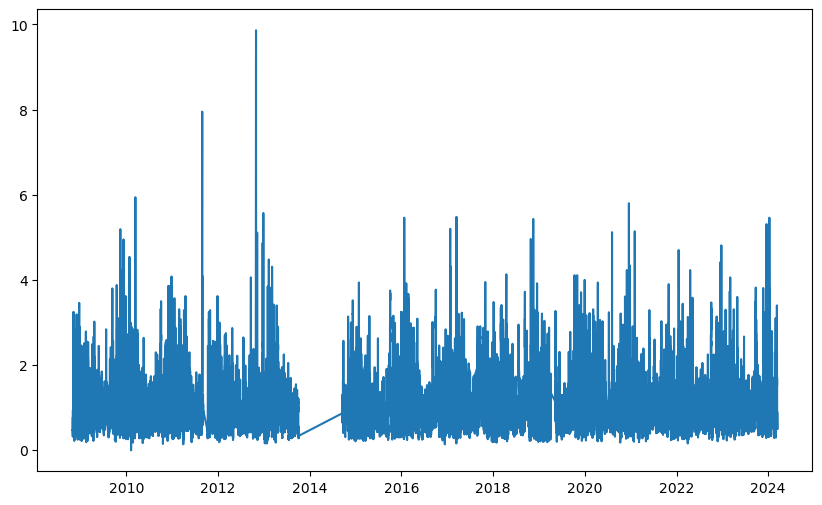

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(df_data["date"], df_data["wave_height"]) # including NULL values

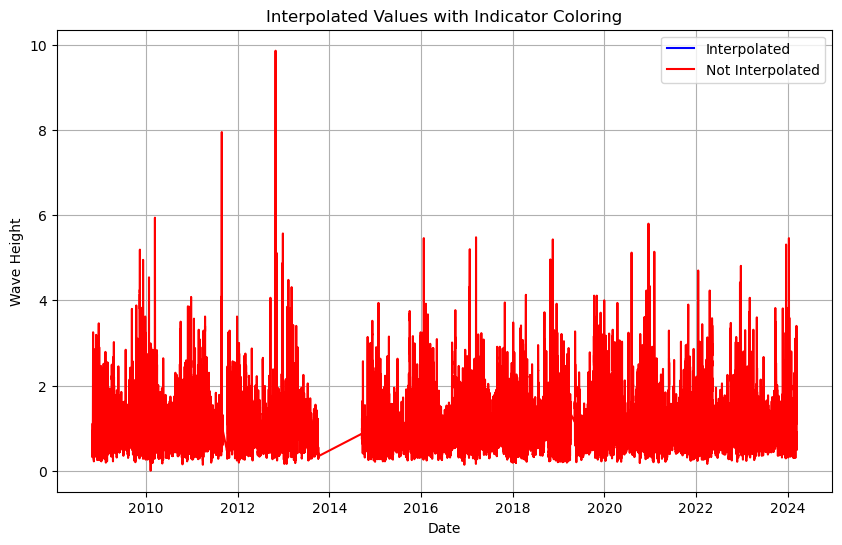

In [50]:
# lets limit the df to 2 columns: date and wave height
ny_buoy_df = df_data[["date","wave_height"]]

# Set 'date' column as the index
ny_buoy_df = ny_buoy_df.set_index("date")

ny_buoy_df['wave_height_interpolated'] = ny_buoy_df['wave_height'].interpolate(method='time') # interpolate missing values based on time
ny_buoy_df['interpolation_indicator'] = ny_buoy_df['wave_height'].isna()

ny_buoy_df = ny_buoy_df.reset_index()

plt.figure(figsize=(10, 6))
#plt.plot(ny_buoy_df["average_period"]) # interpolated NULL values

plt.plot(ny_buoy_df['date'][ny_buoy_df['interpolation_indicator']], ny_buoy_df['wave_height_interpolated'][ny_buoy_df['interpolation_indicator']], color='blue', label='Interpolated')
plt.plot(ny_buoy_df['date'], ny_buoy_df['wave_height'], color='red', label='Not Interpolated')

plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Interpolated Values with Indicator Coloring')
plt.legend()

plt.grid(True)
plt.show()

In [51]:
# lets use the interpolated values and see how good we are at modeling the future
from prophet import Prophet

In [52]:
modeling_df = ny_buoy_df[["date","wave_height_interpolated"]]
modeling_df = modeling_df.rename(columns={"date": "ds", "wave_height_interpolated": "y"})

# Initialize Prophet model
model = Prophet()
model.fit(modeling_df)

16:18:07 - cmdstanpy - INFO - Chain [1] start processing
16:18:32 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)

In [55]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-10-30 17:50:00,1.016093,0.324082,1.699717,1.016093,1.016093,0.031873,0.031873,0.031873,-0.031635,-0.031635,-0.031635,-0.017068,-0.017068,-0.017068,0.080576,0.080576,0.080576,0.0,0.0,0.0,1.047966
1,2008-10-30 18:50:00,1.016101,0.389997,1.755179,1.016101,1.016101,0.035461,0.035461,0.035461,-0.029455,-0.029455,-0.029455,-0.016089,-0.016089,-0.016089,0.081005,0.081005,0.081005,0.0,0.0,0.0,1.051562
2,2008-10-30 19:50:00,1.016109,0.321436,1.762746,1.016109,1.016109,0.045269,0.045269,0.045269,-0.021141,-0.021141,-0.021141,-0.015023,-0.015023,-0.015023,0.081434,0.081434,0.081434,0.0,0.0,0.0,1.061379
3,2008-10-30 20:50:00,1.016118,0.340988,1.803728,1.016118,1.016118,0.059636,0.059636,0.059636,-0.008346,-0.008346,-0.008346,-0.013880,-0.013880,-0.013880,0.081861,0.081861,0.081861,0.0,0.0,0.0,1.075754
4,2008-10-30 22:50:00,1.016135,0.386516,1.804057,1.016135,1.016135,0.091002,0.091002,0.091002,0.019686,0.019686,0.019686,-0.011399,-0.011399,-0.011399,0.082715,0.082715,0.082715,0.0,0.0,0.0,1.107137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135350,2024-03-23 21:50:00,1.089015,0.514896,1.871176,1.089015,1.089015,0.084312,0.084312,0.084312,0.006250,0.006250,0.006250,0.002807,0.002807,0.002807,0.075255,0.075255,0.075255,0.0,0.0,0.0,1.173327
135351,2024-03-24 21:50:00,1.089078,0.414001,1.870544,1.089078,1.089078,0.090170,0.090170,0.090170,0.006250,0.006250,0.006250,0.014867,0.014867,0.014867,0.069053,0.069053,0.069053,0.0,0.0,0.0,1.179248
135352,2024-03-25 21:50:00,1.089141,0.490113,1.856770,1.089141,1.089141,0.069584,0.069584,0.069584,0.006250,0.006250,0.006250,-0.000261,-0.000261,-0.000261,0.063594,0.063594,0.063594,0.0,0.0,0.0,1.158725
135353,2024-03-26 21:50:00,1.089203,0.526585,1.900821,1.089203,1.089203,0.064576,0.064576,0.064576,0.006250,0.006250,0.006250,-0.000561,-0.000561,-0.000561,0.058887,0.058887,0.058887,0.0,0.0,0.0,1.153780


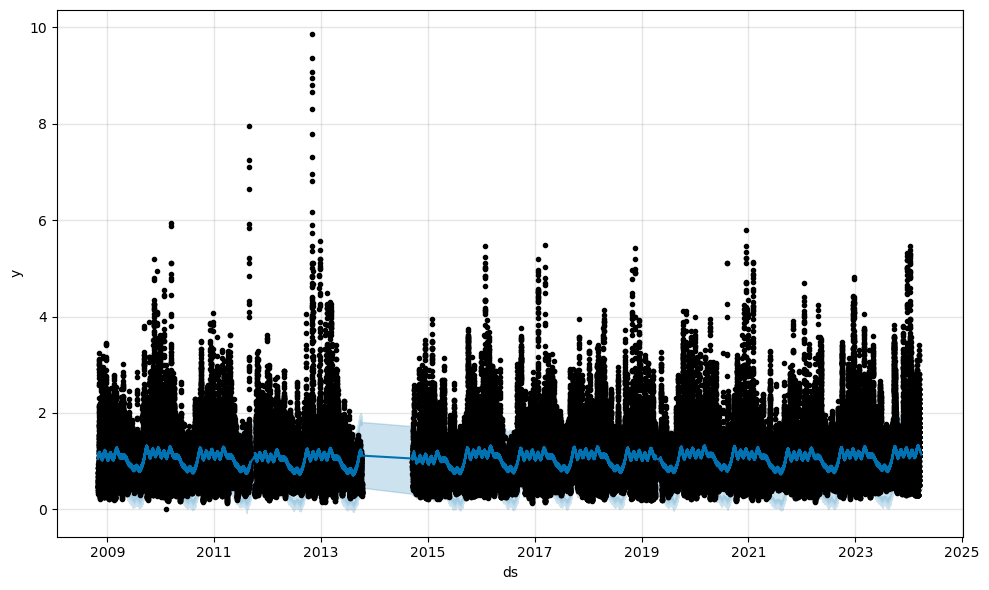

In [54]:
fig1 = model.plot(forecast)